In [2]:
# Importing required libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
from keras.preprocessing import image
from PIL import Image
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf

# To show image within the notebook
%matplotlib inline

## Loading Train Dataset

In [7]:
train_df = pd.read_csv("Train.csv")

In [8]:
train_df.head()

,Dog,Path
0,1,test_sets/all_photos/dog_0.png
1,1,test_sets/all_photos/dog_1.png
2,1,test_sets/all_photos/dog_10.png
3,1,test_sets/all_photos/dog_11.png
4,1,test_sets/all_photos/dog_12.png


In [9]:
len(train_df)

74

In [10]:
# loading input images
train_image = []

for i in tqdm(range(train_df.shape[0])):
    img = tf.keras.utils.load_img(train_df['Path'][i], target_size=(28,28,3))
    img = tf.keras.utils.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|███████████████████████████████████████████████████████████████████████| 74/74 [00:01<00:00, 64.21it/s]


In [11]:
# target
y = train_df['Dog'].values
y = to_categorical(y)

## Images & Labels

test_sets/all_photos/dog_13.png


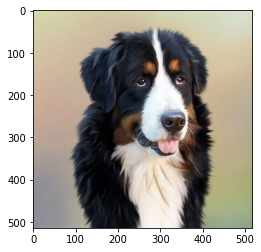

In [12]:
img_num = 5
img = plt.imread(train_df["Path"][img_num])
plt.imshow(img)
print(train_df["Path"][img_num])

## Validation set 

In [13]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=42, test_size=0.2)

### Dataset exploration

## Keras Model 

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [15]:
model = Sequential()
#first layer - input_shape is necessary
model.add(Conv2D(filters=32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(43, activation='softmax'))

2022-06-17 09:01:03.814521: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-17 09:01:03.814764: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1


In [23]:
#compiling
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dense_1 (Dense)             (None, 43)                5547      
                                                        

In [27]:
X_valid.shape

(15, 28, 28, 3)

In [28]:
y_valid.shape

(15, 2)

In [29]:
X_train.shape

(59, 28, 28, 3)

In [30]:
y_train.shape

(59, 2)

In [25]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10


ValueError: in user code:

    File "/Users/mateuszredzia/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "/Users/mateuszredzia/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/mateuszredzia/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "/Users/mateuszredzia/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 890, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/mateuszredzia/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 948, in compute_loss
        return self.compiled_loss(
    File "/Users/mateuszredzia/miniforge3/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/mateuszredzia/miniforge3/lib/python3.9/site-packages/keras/losses.py", line 139, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/mateuszredzia/miniforge3/lib/python3.9/site-packages/keras/losses.py", line 243, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/mateuszredzia/miniforge3/lib/python3.9/site-packages/keras/losses.py", line 1787, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/Users/mateuszredzia/miniforge3/lib/python3.9/site-packages/keras/backend.py", line 5119, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 2) and (None, 43) are incompatible
